тарифы

In [187]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from lxml import html 
from sklearn import feature_extraction 
from scipy.cluster.hierarchy import linkage, dendrogram
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [188]:
df = pd.read_excel('svodnaya_tablica_platezhi_naseleniya2501201912.xlsx',  skiprows=[0])

In [189]:
df.head()

,Unnamed: 0,Unnamed: 1,Количество зон (кластеров),Средняя Плотность ТКО кг/м3,"Для жителя МКД, min по региону","Для жителя МКД, max по региону","Для жителя ИД, min по региону","Для жителя ИД, max по региону","Для жителя МКД, min по региону.1","Для жителя МКД, max по региону.1","Для жителя ИД, min по региону.1","Для жителя ИД, max по региону.1",Min по региону,Max по региону,"МКД, min по региону","МКД, max по региону","ИД, min по региону","ИД, max по региону",Unnamed: 18,Unnamed: 19
0,пфо,Республика Марий Эл,2.0,110.00,203.50,203.50,211.20,211.20,1.85,1.92,1.85,1.92,491.32,536.62,75.750000,85.860000,75.750000,85.860000,NaN,NaN
1,пфо,Республика Мордовия,1.0,150.00,266.00,266.00,316.00,419.00,2.03,2.03,2.20,2.50,546.48,546.48,92.446200,92.446200,100.188000,113.850000,NaN,NaN
2,пфо,Республика Татарстан,2.0,126.63,276.00,276.00,349.00,349.00,2.36,2.36,2.56,2.56,439.03,439.03,86.342567,86.342567,93.659733,93.659733,NaN,NaN
3,пфо,Удмуртская Республика,1.0,114.80,206.64,206.64,199.75,199.75,1.80,1.80,1.74,1.74,656.56,656.56,98.484000,98.484000,95.201200,95.200000,NaN,NaN
4,пфо,Чувашская Республика,1.0,107.00,215.84,215.84,215.84,215.84,2.02,2.02,2.02,2.02,449.71,449.71,75.701183,75.700000,75.700000,75.700000,NaN,NaN


In [190]:
df1 = df[df['Unnamed: 1'].isnull()==False].reset_index(drop='true')

In [191]:
df1 = df1.drop(0, axis=0)
df1 = df1.drop(['Unnamed: 0', 'Unnamed: 18', 'Unnamed: 19'], axis = 1)

In [192]:
df1.head()

,Unnamed: 1,Количество зон (кластеров),Средняя Плотность ТКО кг/м3,"Для жителя МКД, min по региону","Для жителя МКД, max по региону","Для жителя ИД, min по региону","Для жителя ИД, max по региону","Для жителя МКД, min по региону.1","Для жителя МКД, max по региону.1","Для жителя ИД, min по региону.1","Для жителя ИД, max по региону.1",Min по региону,Max по региону,"МКД, min по региону","МКД, max по региону","ИД, min по региону","ИД, max по региону"
1,Республика Мордовия,1.0,150.00,266.00,266.00,316.00,419.00,2.03,2.03,2.20,2.50,546.48,546.48,92.446200,92.446200,100.188000,113.850000
2,Республика Татарстан,2.0,126.63,276.00,276.00,349.00,349.00,2.36,2.36,2.56,2.56,439.03,439.03,86.342567,86.342567,93.659733,93.659733
3,Удмуртская Республика,1.0,114.80,206.64,206.64,199.75,199.75,1.80,1.80,1.74,1.74,656.56,656.56,98.484000,98.484000,95.201200,95.200000
4,Чувашская Республика,1.0,107.00,215.84,215.84,215.84,215.84,2.02,2.02,2.02,2.02,449.71,449.71,75.701183,75.700000,75.700000,75.700000
5,Пермский край,1.0,115.00,267.12,267.12,224.00,224.00,2.32,2.32,1.95,1.95,441.70,441.70,85.428000,85.428000,71.700000,71.700000


In [193]:
df1.columns = ['Регион', 'Количество кластеров', "Средняя Плотность ТКО", 
               "Норматив кг. МКД. мин.", "Норматив кг. МКД. макс.",
              "Норматив кг. ИД. мин.", "Норматив кг. ИД. макс.",
              "Норматив м. куб. МКД. мин.", "Норматив м. куб. МКД. макс.",
              "Норматив м. куб. ИД. мин.", "Норматив м. куб. ИД. макс.",
              "Единый тариф руб. мин", "Единый тариф руб. макс",
              "Плата руб. МКД. мин.", "Плата руь. МКД. макс.",
              "Плата руб. ИД. мин.", "Плата руб. ИД. макс."]

In [194]:
df1

,Регион,Количество кластеров,Средняя Плотность ТКО,Норматив кг. МКД. мин.,Норматив кг. МКД. макс.,Норматив кг. ИД. мин.,Норматив кг. ИД. макс.,Норматив м. куб. МКД. мин.,Норматив м. куб. МКД. макс.,Норматив м. куб. ИД. мин.,Норматив м. куб. ИД. макс.,Единый тариф руб. мин,Единый тариф руб. макс,Плата руб. МКД. мин.,Плата руь. МКД. макс.,Плата руб. ИД. мин.,Плата руб. ИД. макс.
1,Республика Мордовия,1.0,150.00,266.0000,266.0000,316.0000,419.0000,2.030000,2.030000,2.20000,2.500000,546.480000,546.48000,92.446200,92.446200,100.188000,113.850000
2,Республика Татарстан,2.0,126.63,276.0000,276.0000,349.0000,349.0000,2.360000,2.360000,2.56000,2.560000,439.030000,439.03000,86.342567,86.342567,93.659733,93.659733
3,Удмуртская Республика,1.0,114.80,206.6400,206.6400,199.7500,199.7500,1.800000,1.800000,1.74000,1.740000,656.560000,656.56000,98.484000,98.484000,95.201200,95.200000
4,Чувашская Республика,1.0,107.00,215.8400,215.8400,215.8400,215.8400,2.020000,2.020000,2.02000,2.020000,449.710000,449.71000,75.701183,75.700000,75.700000,75.700000
5,Пермский край,1.0,115.00,267.1200,267.1200,224.0000,224.0000,2.320000,2.320000,1.95000,1.950000,441.700000,441.70000,85.428000,85.428000,71.700000,71.700000
6,Кировская область,1.0,200.00,NaN,NaN,NaN,NaN,1.450000,1.732000,1.45000,1.732000,949.620000,949.62000,114.745750,137.061820,114.745750,137.061820
7,Нижегородская область,9.0,NaN,NaN,NaN,NaN,NaN,2.520000,2.520000,2.36000,2.870000,593.540000,744.72000,124.643400,156.391200,116.729533,178.112200
8,Оренбургская область,1.0,198.00,290.0400,372.0000,328.6800,432.0000,1.464848,1.878788,1.66000,2.181818,648.650000,648.65000,79.181164,101.556313,89.729917,117.936364
9,Пензенская область,4.0,130.00,275.0000,299.0000,255.0000,318.0000,2.080000,2.320000,2.11000,2.220000,451.032400,629.72780,78.178949,121.747375,79.306530,116.499643
10,Самарская область,1.0,NaN,NaN,NaN,NaN,NaN,1.950000,2.290000,2.29000,2.350000,598.160000,598.16000,97.201000,114.148867,114.148867,117.139667


In [195]:
incr = pd.read_excel('2017-2018kv2.xls', skiprows=[0,1,2,4,93,94])

In [196]:
incr

,Unnamed: 0,январь,февраль,март,1 кв.,апрель,май,июнь,1 пол.,июль,...,июнь.1,1 пол..1,июль.1,август.1,сентябрь.1,9 мес..1,октябрь.1,ноябрь.1,декабрь.1,2018 год
0,РоссийскаяФедерация,24423,29521,29529,27824,30761,29488,32436,29360,30839,...,33349,30505,32353,31755,31566,30967,32894,31941,47643,32609
1,Центральный федеральный округ,30623,37840,40398,36287,40600,38145,42204,38302,40372,...,42397,38933,40363,39285,38987,39137,42333,41684,62036,41489
2,Белгородская область,24341,27999,30085,27475,29674,28914,31042,28676,30011,...,31483,29743,31129,30279,28500,29819,32717,30400,38754,30878
3,Брянская область,21040,24014,25074,23376,24552,25850,27248,24630,25831,...,27397,24938,27458,28715,28422,26025,29155,28389,36619,27488
4,Владимирская область,18580,23265,23270,21705,20145,24948,24801,22501,23783,...,25251,22944,24378,23601,21965,23068,23316,22926,35049,24185
5,Воронежская область,24320,28444,27991,26918,29322,28170,29675,27987,28641,...,30586,28969,30019,30099,30078,29334,30526,29630,41216,30487
6,Ивановская область,19593,23891,25811,23098,23719,23736,23692,23407,24404,...,24840,22967,23280,23776,23251,23123,26011,24497,33993,24511
7,Калужская область,23189,27791,29541,26840,27528,27288,30606,27657,30600,...,30011,27467,28752,27817,26035,27489,28859,25845,37793,28364
8,Костромская область,20924,23227,24672,22941,25100,24595,25203,23953,25041,...,24638,23173,22119,21579,21634,22707,22559,22193,31121,23464
9,Курская область,20981,24643,24671,23432,24719,24842,26784,24440,25476,...,27694,25194,26480,26613,25902,25573,29966,28350,36946,27218


In [197]:
incr.index = incr['Unnamed: 0']

In [198]:
inc = incr.drop(['РоссийскаяФедерация', 'Центральный федеральный округ', 'Северо-Западный федеральный округ',
                'Южный федеральный округ', 'Северо-Кавказский федеральный округ',
                'Приволжский федеральный округ', 'Уральский федеральный округ',
                'Сибирский федеральный округ', 'Дальневосточный федеральный округ'],
                axis = 0)

In [199]:
inc = inc.reset_index(drop='true')
inc.rename(columns={'Unnamed: 0':'Регион'}, inplace=True)

In [200]:
iinc = inc[['Регион', '2018 год']]

In [201]:
iinc.head()

,Регион,2018 год
0,Белгородская область,30878
1,Брянская область,27488
2,Владимирская область,24185
3,Воронежская область,30487
4,Ивановская область,24511


In [202]:
iinc.rename(columns={'2018 год':'средняя зп 2018 год'},inplace=True)

/Users/macbook/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [203]:
pd.merge(df1, iinc, on='Регион', how='inner').shape

(77, 18)

In [204]:
meow=pd.merge(df1, iinc, on='Регион', how='inner')

In [205]:
iinc[iinc['Регион'].isnull()]

,Регион,средняя зп 2018 год


In [206]:
df1[df1['Регион'].isnull()]

,Регион,Количество кластеров,Средняя Плотность ТКО,Норматив кг. МКД. мин.,Норматив кг. МКД. макс.,Норматив кг. ИД. мин.,Норматив кг. ИД. макс.,Норматив м. куб. МКД. мин.,Норматив м. куб. МКД. макс.,Норматив м. куб. ИД. мин.,Норматив м. куб. ИД. макс.,Единый тариф руб. мин,Единый тариф руб. макс,Плата руб. МКД. мин.,Плата руь. МКД. макс.,Плата руб. ИД. мин.,Плата руб. ИД. макс.


In [207]:
df1.shape, iinc.shape

((80, 17), (79, 2))

In [208]:
pd.DataFrame({
    'df1' : df1['Регион'], 
    'iinc' : iinc['Регион']})

,df1,iinc
0,NaN,Белгородская область
1,Республика Мордовия,Брянская область
2,Республика Татарстан,Владимирская область
3,Удмуртская Республика,Воронежская область
4,Чувашская Республика,Ивановская область
5,Пермский край,Калужская область
6,Кировская область,Костромская область
7,Нижегородская область,Курская область
8,Оренбургская область,Липецкая область
9,Пензенская область,Московская область


In [209]:
meow

,Регион,Количество кластеров,Средняя Плотность ТКО,Норматив кг. МКД. мин.,Норматив кг. МКД. макс.,Норматив кг. ИД. мин.,Норматив кг. ИД. макс.,Норматив м. куб. МКД. мин.,Норматив м. куб. МКД. макс.,Норматив м. куб. ИД. мин.,Норматив м. куб. ИД. макс.,Единый тариф руб. мин,Единый тариф руб. макс,Плата руб. МКД. мин.,Плата руь. МКД. макс.,Плата руб. ИД. мин.,Плата руб. ИД. макс.,средняя зп 2018 год
0,Удмуртская Республика,1.0,114.80,206.6400,206.6400,199.7500,199.7500,1.800000,1.800000,1.74000,1.740000,656.560000,656.56000,98.484000,98.484000,95.201200,95.200000,24631
1,Чувашская Республика,1.0,107.00,215.8400,215.8400,215.8400,215.8400,2.020000,2.020000,2.02000,2.020000,449.710000,449.71000,75.701183,75.700000,75.700000,75.700000,18177
2,Пермский край,1.0,115.00,267.1200,267.1200,224.0000,224.0000,2.320000,2.320000,1.95000,1.950000,441.700000,441.70000,85.428000,85.428000,71.700000,71.700000,28849
3,Кировская область,1.0,200.00,NaN,NaN,NaN,NaN,1.450000,1.732000,1.45000,1.732000,949.620000,949.62000,114.745750,137.061820,114.745750,137.061820,22019
4,Нижегородская область,9.0,NaN,NaN,NaN,NaN,NaN,2.520000,2.520000,2.36000,2.870000,593.540000,744.72000,124.643400,156.391200,116.729533,178.112200,31700
5,Оренбургская область,1.0,198.00,290.0400,372.0000,328.6800,432.0000,1.464848,1.878788,1.66000,2.181818,648.650000,648.65000,79.181164,101.556313,89.729917,117.936364,23923
6,Пензенская область,4.0,130.00,275.0000,299.0000,255.0000,318.0000,2.080000,2.320000,2.11000,2.220000,451.032400,629.72780,78.178949,121.747375,79.306530,116.499643,21549
7,Самарская область,1.0,NaN,NaN,NaN,NaN,NaN,1.950000,2.290000,2.29000,2.350000,598.160000,598.16000,97.201000,114.148867,114.148867,117.139667,27549
8,Саратовская область,1.0,128.00,264.0000,288.0000,143.0000,390.0000,2.200000,2.400000,1.30000,3.000000,562.620000,562.62000,103.147000,112.524000,60.950500,140.655000,20634
9,Ульяновская область,5.0,NaN,NaN,NaN,NaN,NaN,2.300000,2.300000,2.33000,2.330000,527.350000,621.10000,101.075417,119.044167,102.393792,120.596917,23014


In [210]:
df=pd.merge(df1, iinc, on='Регион', how='inner')

In [211]:
df1=pd.DataFrame(df)

In [212]:
df1.dropna(subset=['Единый тариф руб. макс'], inplace = True)

In [213]:
df1['средняя зп 2018 год'].astype(int)

0     24631
1     18177
2     28849
3     22019
4     31700
5     23923
6     21549
7     27549
8     20634
9     23014
10    21006
11    36284
12    43508
13    23868
14    46258
15    74304
16    30878
17    27488
18    24185
19    30487
20    24511
21    28364
22    23464
23    27218
24    29921
25    42814
26    24658
27    25751
28    26085
29    26233
      ...  
47    23024
48    28885
49    26193
50    24988
51    15751
52    21371
53    17397
54    22802
55    24202
56    19412
57    14379
58    21826
59    22483
60    28561
61    22891
62    22208
63    25461
64    25268
65    26320
66    24837
67    42172
68    24220
69    45034
70    34620
71    39653
72    31883
73    53137
74    49543
75    23823
76    72716
Name: средняя зп 2018 год, Length: 77, dtype: int64

In [214]:
df1['Единый тариф руб. макс'].astype('float')

0      656.56000
1      449.71000
2      441.70000
3      949.62000
4      744.72000
5      648.65000
6      629.72780
7      598.16000
8      562.62000
9      621.10000
10     246.00000
11     845.87000
12     556.76000
13     444.23000
14     731.80000
15     746.90000
16     533.27000
17     526.76000
18     580.54000
19     591.14000
20     488.95000
21     496.75000
22     598.80000
23     570.11000
24     548.66000
25     949.55000
26     469.42000
27     500.00000
28     608.30000
29     580.28000
         ...    
47     533.40000
48     590.88000
49     377.05000
50     386.72000
51     550.10000
52     377.15000
53     433.84000
54     554.14000
55     745.98000
56     774.20000
57     684.29000
58     901.61000
59     681.31000
60    2487.85000
61     595.33000
62     493.64000
63     466.00000
64     317.59000
65     761.24400
66     889.53304
67     949.53000
68    1023.60000
69    1453.68000
70     812.00000
71     570.26000
72     615.94000
73     425.00000
74     400.000

Text(0,0.5,'Единый тариф за обращение с ТКО руб/кб.м')

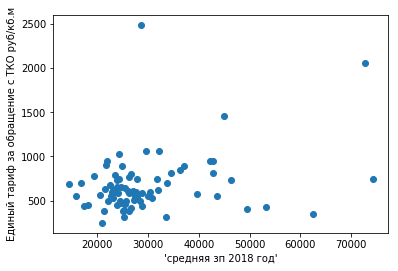

In [215]:
plt.scatter(df1['средняя зп 2018 год'], df1['Единый тариф руб. макс'])
plt.xlabel("'средняя зп 2018 год'")
plt.ylabel("Единый тариф за обращение с ТКО руб/кб.м")

In [219]:

df2=df1[df1['Единый тариф руб. макс']<1300]#нужно удалить аутлаеры 

Text(0,0.5,'Единый тариф за обращение с ТКО руб/кб.м')

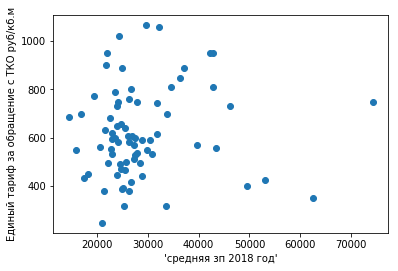

In [406]:
plt.scatter(df2['средняя зп 2018 год'], df2['Единый тариф руб. макс'])
plt.xlabel("'средняя зп 2018 год'")
plt.ylabel("Единый тариф за обращение с ТКО руб/кб.м")

In [223]:
df2.head()

,Регион,Количество кластеров,Средняя Плотность ТКО,Норматив кг. МКД. мин.,Норматив кг. МКД. макс.,Норматив кг. ИД. мин.,Норматив кг. ИД. макс.,Норматив м. куб. МКД. мин.,Норматив м. куб. МКД. макс.,Норматив м. куб. ИД. мин.,Норматив м. куб. ИД. макс.,Единый тариф руб. мин,Единый тариф руб. макс,Плата руб. МКД. мин.,Плата руь. МКД. макс.,Плата руб. ИД. мин.,Плата руб. ИД. макс.,средняя зп 2018 год
0,Удмуртская Республика,1.0,114.8,206.64,206.64,199.75,199.75,1.80,1.800,1.74,1.740,656.56,656.56,98.484000,98.48400,95.201200,95.20000,24631
1,Чувашская Республика,1.0,107.0,215.84,215.84,215.84,215.84,2.02,2.020,2.02,2.020,449.71,449.71,75.701183,75.70000,75.700000,75.70000,18177
2,Пермский край,1.0,115.0,267.12,267.12,224.00,224.00,2.32,2.320,1.95,1.950,441.70,441.70,85.428000,85.42800,71.700000,71.70000,28849
3,Кировская область,1.0,200.0,NaN,NaN,NaN,NaN,1.45,1.732,1.45,1.732,949.62,949.62,114.745750,137.06182,114.745750,137.06182,22019
4,Нижегородская область,9.0,NaN,NaN,NaN,NaN,NaN,2.52,2.520,2.36,2.870,593.54,744.72,124.643400,156.39120,116.729533,178.11220,31700


In [226]:
df1['Плата руь. МКД. макс.'].astype('float')

0      95.200000
1      75.700000
2      71.700000
3     137.061820
4     178.112200
5     117.936364
6     116.499643
7     117.139667
8     140.655000
9     120.596917
10     17.892000
11    182.120000
12    119.240000
13     59.600858
14    320.772333
15    188.590000
16    124.429667
17     89.110000
18    123.360000
19    158.622567
20     88.011000
21    103.489583
22    143.712000
23     71.263750
24     93.272200
25    227.100708
26     97.795833
27     99.580000
28     92.260000
29    178.919667
         ...    
47     96.456500
48    153.628800
49     97.718792
50     55.860000
51    137.520000
52     99.630458
53    148.228667
54     95.127367
55    174.062000
56    105.856366
57    108.350000
58    138.998208
59    122.635800
60    124.392500
61    154.785800
62     85.152900
63     92.420000
64     30.090000
65    195.385960
66    168.270000
67    148.760000
68     63.570000
69    297.330000
70    108.360000
71    256.615515
72     68.683469
73    113.333333
74     70.0000

In [233]:
df1['Плата руб. МКД. мин.'].astype('float')

0      98.484000
1      75.701183
2      85.428000
3     114.745750
4     124.643400
5      79.181164
6      78.178949
7      97.201000
8     103.147000
9     101.075417
10     17.892000
11    120.590000
12    139.060000
13     67.327867
14    111.599500
15    150.000000
16    111.097917
17     89.110000
18    118.040000
19    152.711167
20     88.011000
21    127.085208
22     95.567983
23     51.124333
24     83.704600
25    176.904408
26     78.236667
27     59.750000
28     92.258833
29     99.131167
         ...    
47     43.276867
48     75.218067
49     91.434625
50      8.710000
51    100.851667
52     85.045567
53     82.791133
54     74.808900
55     89.105333
56     53.679783
57     79.833833
58     55.882333
59     33.870792
60     81.498600
61     67.975700
62     85.152900
63     92.423333
64     57.960000
65     69.866744
66     93.890000
67     84.090000
68     63.570000
69    107.790000
70    108.360000
71     13.438548
72    132.955603
73    106.250000
74     70.0000

In [234]:
df1['Плата руб. ИД. мин.'].astype('float')

0      95.201200
1      75.700000
2      71.700000
3     114.745750
4     116.729533
5      89.729917
6      79.306530
7     114.148867
8      60.950500
9     102.393792
10     17.892000
11    135.580000
12    119.240000
13     52.114358
14    200.635167
15    188.590000
16     88.878333
17     89.110000
18    123.360000
19    152.711167
20     88.011000
21     66.233333
22    127.585683
23     69.715000
24     83.704600
25    176.904408
26     88.016250
27     59.750000
28     92.260000
29    100.581867
         ...    
47     43.276867
48     69.260200
49     97.718792
50      8.710000
51    137.525000
52     90.165367
53     91.106400
54     85.891700
55     83.536250
56     61.729493
57    108.345917
58     55.882333
59     33.870792
60     81.498600
61     94.120200
62     85.152900
63     92.420000
64     30.090000
65     23.070016
66    107.100000
67     92.930000
68     63.570000
69    105.080000
70    108.360000
71     22.207770
72     66.477802
73    113.333333
74     70.0000

In [235]:

df1['Плата руб. ИД. макс.'].astype('float')

0      95.200000
1      75.700000
2      71.700000
3     137.061820
4     178.112200
5     117.936364
6     116.499643
7     117.139667
8     140.655000
9     120.596917
10     17.892000
11    182.120000
12    119.240000
13     59.600858
14    320.772333
15    188.590000
16    124.429667
17     89.110000
18    123.360000
19    158.622567
20     88.011000
21    103.489583
22    143.712000
23     71.263750
24     93.272200
25    227.100708
26     97.795833
27     99.580000
28     92.260000
29    178.919667
         ...    
47     96.456500
48    153.628800
49     97.718792
50     55.860000
51    137.520000
52     99.630458
53    148.228667
54     95.127367
55    174.062000
56    105.856366
57    108.350000
58    138.998208
59    122.635800
60    124.392500
61    154.785800
62     85.152900
63     92.420000
64     30.090000
65    195.385960
66    168.270000
67    148.760000
68     63.570000
69    297.330000
70    108.360000
71    256.615515
72     68.683469
73    113.333333
74     70.0000

In [243]:
df1[['Плата руь. МКД. макс.','Плата руб. МКД. мин.','Плата руб. ИД. мин.','Плата руб. ИД. макс.']].mean()

Плата руь. МКД. макс.    115.385793
Плата руб. МКД. мин.      88.275626
Плата руб. ИД. мин.       89.072492
Плата руб. ИД. макс.     124.044918
dtype: float64

In [268]:
df1['плата с 1 человека руб/месяц среднее']=(df1['Плата руь. МКД. макс.']+df1['Плата руб. МКД. мин.']+df1['Плата руб. ИД. мин.']+df1['Плата руб. ИД. макс.'])/4

In [342]:
df1['объемы платежей за год/человек']=df1['плата с 1 человека руб/месяц среднее']*0.6*12

In [343]:
df1

,Регион,Количество кластеров,Средняя Плотность ТКО,Норматив кг. МКД. мин.,Норматив кг. МКД. макс.,Норматив кг. ИД. мин.,Норматив кг. ИД. макс.,Норматив м. куб. МКД. мин.,Норматив м. куб. МКД. макс.,Норматив м. куб. ИД. мин.,...,Плата руь. МКД. макс.,Плата руб. ИД. мин.,Плата руб. ИД. макс.,средняя зп 2018 год,плата с 1 человека руб/месяц среднее,объемы платежей,объемы платежей за год,кассовые разрывы,кассовые разрывы/на человека,объемы платежей за год/человек
0,Удмуртская Республика,1.00,114.80,206.64,206.64,199.75,199.75,1.80,1.80,1.74,...,98.48,95.20,95.20,24631,96.84,1104.00,1104.00,58.11,58.11,697.26
1,Чувашская Республика,1.00,107.00,215.84,215.84,215.84,215.84,2.02,2.02,2.02,...,75.70,75.70,75.70,18177,75.70,862.98,862.98,45.42,45.42,545.04
2,Пермский край,1.00,115.00,267.12,267.12,224.00,224.00,2.32,2.32,1.95,...,85.43,71.70,71.70,28849,78.56,895.63,895.63,47.14,47.14,565.66
3,Кировская область,1.00,200.00,nan,nan,nan,nan,1.45,1.73,1.45,...,137.06,114.75,137.06,22019,125.90,1435.30,1435.30,75.54,75.54,906.51
4,Нижегородская область,9.00,nan,nan,nan,nan,nan,2.52,2.52,2.36,...,156.39,116.73,178.11,31700,143.97,1641.25,1641.25,86.38,86.38,1036.58
5,Оренбургская область,1.00,198.00,290.04,372.00,328.68,432.00,1.46,1.88,1.66,...,101.56,89.73,117.94,23923,97.10,1106.95,1106.95,58.26,58.26,699.13
6,Пензенская область,4.00,130.00,275.00,299.00,255.00,318.00,2.08,2.32,2.11,...,121.75,79.31,116.50,21549,98.93,1127.84,1127.84,59.36,59.36,712.32
7,Самарская область,1.00,nan,nan,nan,nan,nan,1.95,2.29,2.29,...,114.15,114.15,117.14,27549,110.66,1261.52,1261.52,66.40,66.40,796.75
8,Саратовская область,1.00,128.00,264.00,288.00,143.00,390.00,2.20,2.40,1.30,...,112.52,60.95,140.66,20634,104.32,1189.24,1189.24,62.59,62.59,751.10
9,Ульяновская область,5.00,nan,nan,nan,nan,nan,2.30,2.30,2.33,...,119.04,102.39,120.60,23014,110.78,1262.86,1262.86,66.47,66.47,797.60


In [344]:
df1['кассовые разрывы/на человека']=df1['плата с 1 человека руб/месяц среднее']*0.4*12

In [377]:
nas = pd.read_excel('население по регионам.xlsx')

In [378]:
nas

,Регион,Население
0,Алтайский край,700509
1,Амурская область,17201746
2,Архангельская область,998393
3,Астраханская область,2341447
4,Белгородская область,795809
5,Брянская область,1149574
6,Владимирская область,1147118
7,Волгоградская область,1010768
8,Вологодская область,1105661
9,Воронежская область,1024759


In [379]:
df1

,Регион,Количество кластеров,Средняя Плотность ТКО,Норматив кг. МКД. мин.,Норматив кг. МКД. макс.,Норматив кг. ИД. мин.,Норматив кг. ИД. макс.,Норматив м. куб. МКД. мин.,Норматив м. куб. МКД. макс.,Норматив м. куб. ИД. мин.,...,Плата руь. МКД. макс.,Плата руб. ИД. мин.,Плата руб. ИД. макс.,средняя зп 2018 год,плата с 1 человека руб/месяц среднее,объемы платежей,объемы платежей за год,кассовые разрывы,кассовые разрывы/на человека,объемы платежей за год/человек
0,Удмуртская Республика,1.00,114.80,206.64,206.64,199.75,199.75,1.80,1.80,1.74,...,98.48,95.20,95.20,24631,96.84,1104.00,1104.00,58.11,464.84,697.26
1,Чувашская Республика,1.00,107.00,215.84,215.84,215.84,215.84,2.02,2.02,2.02,...,75.70,75.70,75.70,18177,75.70,862.98,862.98,45.42,363.36,545.04
2,Пермский край,1.00,115.00,267.12,267.12,224.00,224.00,2.32,2.32,1.95,...,85.43,71.70,71.70,28849,78.56,895.63,895.63,47.14,377.11,565.66
3,Кировская область,1.00,200.00,nan,nan,nan,nan,1.45,1.73,1.45,...,137.06,114.75,137.06,22019,125.90,1435.30,1435.30,75.54,604.34,906.51
4,Нижегородская область,9.00,nan,nan,nan,nan,nan,2.52,2.52,2.36,...,156.39,116.73,178.11,31700,143.97,1641.25,1641.25,86.38,691.05,1036.58
5,Оренбургская область,1.00,198.00,290.04,372.00,328.68,432.00,1.46,1.88,1.66,...,101.56,89.73,117.94,23923,97.10,1106.95,1106.95,58.26,466.08,699.13
6,Пензенская область,4.00,130.00,275.00,299.00,255.00,318.00,2.08,2.32,2.11,...,121.75,79.31,116.50,21549,98.93,1127.84,1127.84,59.36,474.88,712.32
7,Самарская область,1.00,nan,nan,nan,nan,nan,1.95,2.29,2.29,...,114.15,114.15,117.14,27549,110.66,1261.52,1261.52,66.40,531.17,796.75
8,Саратовская область,1.00,128.00,264.00,288.00,143.00,390.00,2.20,2.40,1.30,...,112.52,60.95,140.66,20634,104.32,1189.24,1189.24,62.59,500.73,751.10
9,Ульяновская область,5.00,nan,nan,nan,nan,nan,2.30,2.30,2.33,...,119.04,102.39,120.60,23014,110.78,1262.86,1262.86,66.47,531.73,797.60


In [348]:
pd.merge(df1, nas, on='Регион', how='inner').shape

(77, 25)

In [380]:
df3=pd.merge(df1, nas, on='Регион', how='inner')

In [381]:
df3

,Регион,Количество кластеров,Средняя Плотность ТКО,Норматив кг. МКД. мин.,Норматив кг. МКД. макс.,Норматив кг. ИД. мин.,Норматив кг. ИД. макс.,Норматив м. куб. МКД. мин.,Норматив м. куб. МКД. макс.,Норматив м. куб. ИД. мин.,...,Плата руб. ИД. мин.,Плата руб. ИД. макс.,средняя зп 2018 год,плата с 1 человека руб/месяц среднее,объемы платежей,объемы платежей за год,кассовые разрывы,кассовые разрывы/на человека,объемы платежей за год/человек,Население
0,Удмуртская Республика,1.00,114.80,206.64,206.64,199.75,199.75,1.80,1.80,1.74,...,95.20,95.20,24631,96.84,1104.00,1104.00,58.11,464.84,697.26,1510217
1,Чувашская Республика,1.00,107.00,215.84,215.84,215.84,215.84,2.02,2.02,2.02,...,75.70,75.70,18177,75.70,862.98,862.98,45.42,363.36,545.04,1227256
2,Пермский край,1.00,115.00,267.12,267.12,224.00,224.00,2.32,2.32,1.95,...,71.70,71.70,28849,78.56,895.63,895.63,47.14,377.11,565.66,2875261
3,Кировская область,1.00,200.00,nan,nan,nan,nan,1.45,1.73,1.45,...,114.75,137.06,22019,125.90,1435.30,1435.30,75.54,604.34,906.51,1111139
4,Нижегородская область,9.00,nan,nan,nan,nan,nan,2.52,2.52,2.36,...,116.73,178.11,31700,143.97,1641.25,1641.25,86.38,691.05,1036.58,4211386
5,Оренбургская область,1.00,198.00,290.04,372.00,328.68,432.00,1.46,1.88,1.66,...,89.73,117.94,23923,97.10,1106.95,1106.95,58.26,466.08,699.13,2616961
6,Пензенская область,4.00,130.00,275.00,299.00,255.00,318.00,2.08,2.32,2.11,...,79.31,116.50,21549,98.93,1127.84,1127.84,59.36,474.88,712.32,640296
7,Самарская область,1.00,nan,nan,nan,nan,nan,1.95,2.29,2.29,...,114.15,117.14,27549,110.66,1261.52,1261.52,66.40,531.17,796.75,1117805
8,Саратовская область,1.00,128.00,264.00,288.00,143.00,390.00,2.20,2.40,1.30,...,60.95,140.66,20634,104.32,1189.24,1189.24,62.59,500.73,751.10,274030
9,Ульяновская область,5.00,nan,nan,nan,nan,nan,2.30,2.30,2.33,...,102.39,120.60,23014,110.78,1262.86,1262.86,66.47,531.73,797.60,1242517


In [382]:
df3['Население']=df3['Население'].str.strip()

In [383]:
df3['Население']=pd.to_numeric(df3['Население'])

In [384]:
df3

,Регион,Количество кластеров,Средняя Плотность ТКО,Норматив кг. МКД. мин.,Норматив кг. МКД. макс.,Норматив кг. ИД. мин.,Норматив кг. ИД. макс.,Норматив м. куб. МКД. мин.,Норматив м. куб. МКД. макс.,Норматив м. куб. ИД. мин.,...,Плата руб. ИД. мин.,Плата руб. ИД. макс.,средняя зп 2018 год,плата с 1 человека руб/месяц среднее,объемы платежей,объемы платежей за год,кассовые разрывы,кассовые разрывы/на человека,объемы платежей за год/человек,Население
0,Удмуртская Республика,1.00,114.80,206.64,206.64,199.75,199.75,1.80,1.80,1.74,...,95.20,95.20,24631,96.84,1104.00,1104.00,58.11,464.84,697.26,1510217
1,Чувашская Республика,1.00,107.00,215.84,215.84,215.84,215.84,2.02,2.02,2.02,...,75.70,75.70,18177,75.70,862.98,862.98,45.42,363.36,545.04,1227256
2,Пермский край,1.00,115.00,267.12,267.12,224.00,224.00,2.32,2.32,1.95,...,71.70,71.70,28849,78.56,895.63,895.63,47.14,377.11,565.66,2875261
3,Кировская область,1.00,200.00,nan,nan,nan,nan,1.45,1.73,1.45,...,114.75,137.06,22019,125.90,1435.30,1435.30,75.54,604.34,906.51,1111139
4,Нижегородская область,9.00,nan,nan,nan,nan,nan,2.52,2.52,2.36,...,116.73,178.11,31700,143.97,1641.25,1641.25,86.38,691.05,1036.58,4211386
5,Оренбургская область,1.00,198.00,290.04,372.00,328.68,432.00,1.46,1.88,1.66,...,89.73,117.94,23923,97.10,1106.95,1106.95,58.26,466.08,699.13,2616961
6,Пензенская область,4.00,130.00,275.00,299.00,255.00,318.00,2.08,2.32,2.11,...,79.31,116.50,21549,98.93,1127.84,1127.84,59.36,474.88,712.32,640296
7,Самарская область,1.00,nan,nan,nan,nan,nan,1.95,2.29,2.29,...,114.15,117.14,27549,110.66,1261.52,1261.52,66.40,531.17,796.75,1117805
8,Саратовская область,1.00,128.00,264.00,288.00,143.00,390.00,2.20,2.40,1.30,...,60.95,140.66,20634,104.32,1189.24,1189.24,62.59,500.73,751.10,274030
9,Ульяновская область,5.00,nan,nan,nan,nan,nan,2.30,2.30,2.33,...,102.39,120.60,23014,110.78,1262.86,1262.86,66.47,531.73,797.60,1242517


In [367]:
df3.dtypes

Регион                                   object
Количество кластеров                    float64
Средняя Плотность ТКО                   float64
Норматив кг. МКД. мин.                  float64
Норматив кг. МКД. макс.                 float64
Норматив кг. ИД. мин.                   float64
Норматив кг. ИД. макс.                  float64
Норматив м. куб. МКД. мин.              float64
Норматив м. куб. МКД. макс.             float64
Норматив м. куб. ИД. мин.               float64
Норматив м. куб. ИД. макс.              float64
Единый тариф руб. мин                   float64
Единый тариф руб. макс                  float64
Плата руб. МКД. мин.                    float64
Плата руь. МКД. макс.                   float64
Плата руб. ИД. мин.                     float64
Плата руб. ИД. макс.                    float64
средняя зп 2018 год                       int64
плата с 1 человека руб/месяц среднее    float64
объемы платежей                         float64
объемы платежей за год                  

In [395]:
df3['объемы платежей за год']=df3['плата с 1 человека руб/месяц среднее']*0.6*12*df3['Население']

In [396]:
df3

,Регион,Количество кластеров,Средняя Плотность ТКО,Норматив кг. МКД. мин.,Норматив кг. МКД. макс.,Норматив кг. ИД. мин.,Норматив кг. ИД. макс.,Норматив м. куб. МКД. мин.,Норматив м. куб. МКД. макс.,Норматив м. куб. ИД. мин.,...,Плата руб. МКД. мин.,Плата руь. МКД. макс.,Плата руб. ИД. мин.,Плата руб. ИД. макс.,средняя зп 2018 год,плата с 1 человека руб/месяц среднее,объемы платежей за год,кассовые разрывы/на человека,объемы платежей за год/человек,Население
0,Удмуртская Республика,1.00,114.80,206.64,206.64,199.75,199.75,1.80,1.80,1.74,...,98.48,98.48,95.20,95.20,24631,96.84,1053020792.01,464.84,697.26,1510217
1,Чувашская Республика,1.00,107.00,215.84,215.84,215.84,215.84,2.02,2.02,2.02,...,75.70,75.70,75.70,75.70,18177,75.70,668906224.30,363.36,545.04,1227256
2,Пермский край,1.00,115.00,267.12,267.12,224.00,224.00,2.32,2.32,1.95,...,85.43,85.43,71.70,71.70,28849,78.56,1626422437.47,377.11,565.66,2875261
3,Кировская область,1.00,200.00,nan,nan,nan,nan,1.45,1.73,1.45,...,114.75,137.06,114.75,137.06,22019,125.90,1007255561.48,604.34,906.51,1111139
4,Нижегородская область,9.00,nan,nan,nan,nan,nan,2.52,2.52,2.36,...,124.64,156.39,116.73,178.11,31700,143.97,4365427550.28,691.05,1036.58,4211386
5,Оренбургская область,1.00,198.00,290.04,372.00,328.68,432.00,1.46,1.88,1.66,...,79.18,101.56,89.73,117.94,23923,97.10,1829587474.49,466.08,699.13,2616961
6,Пензенская область,4.00,130.00,275.00,299.00,255.00,318.00,2.08,2.32,2.11,...,78.18,121.75,79.31,116.50,21549,98.93,456094683.20,474.88,712.32,640296
7,Самарская область,1.00,nan,nan,nan,nan,nan,1.95,2.29,2.29,...,97.20,114.15,114.15,117.14,27549,110.66,890610150.08,531.17,796.75,1117805
8,Саратовская область,1.00,128.00,264.00,288.00,143.00,390.00,2.20,2.40,1.30,...,103.15,112.52,60.95,140.66,20634,104.32,205823302.73,500.73,751.10,274030
9,Ульяновская область,5.00,nan,nan,nan,nan,nan,2.30,2.30,2.33,...,101.08,119.04,102.39,120.60,23014,110.78,991029726.49,531.73,797.60,1242517


In [397]:
df3['объемы платежей за год']

0     1053020792.01
1      668906224.30
2     1626422437.47
3     1007255561.48
4     4365427550.28
5     1829587474.49
6      456094683.20
7      890610150.08
8      205823302.73
9      991029726.49
10      60022736.12
11    1039420896.70
12    3448167067.80
13    1605878594.58
14    2289703181.97
15     658234806.01
16     623840166.18
17     737557481.81
18     996891426.72
19    1161272659.59
20    2043417078.41
21     460388345.09
22    3336012368.40
23    1191973425.84
24     643113657.43
25    2774851451.89
26    8602202973.71
27    4706640575.86
28     880077240.84
29     768738038.70
          ...      
47    1177841779.85
48    4345750332.06
49    6704053022.06
50     458015052.53
51    2104067827.01
52    1028094522.92
53   23512065266.94
54     887616665.34
55    1116745060.30
56     473803962.14
57    5115756012.99
58     308649385.37
59     394683393.68
60    1016989946.89
61     267554332.71
62     739144611.31
63    1550980916.85
64     143927938.80
65     944621162.90


In [398]:
df3

,Регион,Количество кластеров,Средняя Плотность ТКО,Норматив кг. МКД. мин.,Норматив кг. МКД. макс.,Норматив кг. ИД. мин.,Норматив кг. ИД. макс.,Норматив м. куб. МКД. мин.,Норматив м. куб. МКД. макс.,Норматив м. куб. ИД. мин.,...,Плата руб. МКД. мин.,Плата руь. МКД. макс.,Плата руб. ИД. мин.,Плата руб. ИД. макс.,средняя зп 2018 год,плата с 1 человека руб/месяц среднее,объемы платежей за год,кассовые разрывы/на человека,объемы платежей за год/человек,Население
0,Удмуртская Республика,1.00,114.80,206.64,206.64,199.75,199.75,1.80,1.80,1.74,...,98.48,98.48,95.20,95.20,24631,96.84,1053020792.01,464.84,697.26,1510217
1,Чувашская Республика,1.00,107.00,215.84,215.84,215.84,215.84,2.02,2.02,2.02,...,75.70,75.70,75.70,75.70,18177,75.70,668906224.30,363.36,545.04,1227256
2,Пермский край,1.00,115.00,267.12,267.12,224.00,224.00,2.32,2.32,1.95,...,85.43,85.43,71.70,71.70,28849,78.56,1626422437.47,377.11,565.66,2875261
3,Кировская область,1.00,200.00,nan,nan,nan,nan,1.45,1.73,1.45,...,114.75,137.06,114.75,137.06,22019,125.90,1007255561.48,604.34,906.51,1111139
4,Нижегородская область,9.00,nan,nan,nan,nan,nan,2.52,2.52,2.36,...,124.64,156.39,116.73,178.11,31700,143.97,4365427550.28,691.05,1036.58,4211386
5,Оренбургская область,1.00,198.00,290.04,372.00,328.68,432.00,1.46,1.88,1.66,...,79.18,101.56,89.73,117.94,23923,97.10,1829587474.49,466.08,699.13,2616961
6,Пензенская область,4.00,130.00,275.00,299.00,255.00,318.00,2.08,2.32,2.11,...,78.18,121.75,79.31,116.50,21549,98.93,456094683.20,474.88,712.32,640296
7,Самарская область,1.00,nan,nan,nan,nan,nan,1.95,2.29,2.29,...,97.20,114.15,114.15,117.14,27549,110.66,890610150.08,531.17,796.75,1117805
8,Саратовская область,1.00,128.00,264.00,288.00,143.00,390.00,2.20,2.40,1.30,...,103.15,112.52,60.95,140.66,20634,104.32,205823302.73,500.73,751.10,274030
9,Ульяновская область,5.00,nan,nan,nan,nan,nan,2.30,2.30,2.33,...,101.08,119.04,102.39,120.60,23014,110.78,991029726.49,531.73,797.60,1242517


In [399]:
del df3['объемы платежей']

KeyError: 'объемы платежей'

In [400]:
del df3['кассовые разрывы']

KeyError: 'кассовые разрывы'

In [401]:
pd.options.display.float_format='{:.2f}'.format

In [402]:
df3

,Регион,Количество кластеров,Средняя Плотность ТКО,Норматив кг. МКД. мин.,Норматив кг. МКД. макс.,Норматив кг. ИД. мин.,Норматив кг. ИД. макс.,Норматив м. куб. МКД. мин.,Норматив м. куб. МКД. макс.,Норматив м. куб. ИД. мин.,...,Плата руб. МКД. мин.,Плата руь. МКД. макс.,Плата руб. ИД. мин.,Плата руб. ИД. макс.,средняя зп 2018 год,плата с 1 человека руб/месяц среднее,объемы платежей за год,кассовые разрывы/на человека,объемы платежей за год/человек,Население
0,Удмуртская Республика,1.00,114.80,206.64,206.64,199.75,199.75,1.80,1.80,1.74,...,98.48,98.48,95.20,95.20,24631,96.84,1053020792.01,464.84,697.26,1510217
1,Чувашская Республика,1.00,107.00,215.84,215.84,215.84,215.84,2.02,2.02,2.02,...,75.70,75.70,75.70,75.70,18177,75.70,668906224.30,363.36,545.04,1227256
2,Пермский край,1.00,115.00,267.12,267.12,224.00,224.00,2.32,2.32,1.95,...,85.43,85.43,71.70,71.70,28849,78.56,1626422437.47,377.11,565.66,2875261
3,Кировская область,1.00,200.00,nan,nan,nan,nan,1.45,1.73,1.45,...,114.75,137.06,114.75,137.06,22019,125.90,1007255561.48,604.34,906.51,1111139
4,Нижегородская область,9.00,nan,nan,nan,nan,nan,2.52,2.52,2.36,...,124.64,156.39,116.73,178.11,31700,143.97,4365427550.28,691.05,1036.58,4211386
5,Оренбургская область,1.00,198.00,290.04,372.00,328.68,432.00,1.46,1.88,1.66,...,79.18,101.56,89.73,117.94,23923,97.10,1829587474.49,466.08,699.13,2616961
6,Пензенская область,4.00,130.00,275.00,299.00,255.00,318.00,2.08,2.32,2.11,...,78.18,121.75,79.31,116.50,21549,98.93,456094683.20,474.88,712.32,640296
7,Самарская область,1.00,nan,nan,nan,nan,nan,1.95,2.29,2.29,...,97.20,114.15,114.15,117.14,27549,110.66,890610150.08,531.17,796.75,1117805
8,Саратовская область,1.00,128.00,264.00,288.00,143.00,390.00,2.20,2.40,1.30,...,103.15,112.52,60.95,140.66,20634,104.32,205823302.73,500.73,751.10,274030
9,Ульяновская область,5.00,nan,nan,nan,nan,nan,2.30,2.30,2.33,...,101.08,119.04,102.39,120.60,23014,110.78,991029726.49,531.73,797.60,1242517


In [403]:
df3['кассовые разрывы платежей за год']=df3['плата с 1 человека руб/месяц среднее']*0.4*12*df3['Население']

In [404]:
df3

,Регион,Количество кластеров,Средняя Плотность ТКО,Норматив кг. МКД. мин.,Норматив кг. МКД. макс.,Норматив кг. ИД. мин.,Норматив кг. ИД. макс.,Норматив м. куб. МКД. мин.,Норматив м. куб. МКД. макс.,Норматив м. куб. ИД. мин.,...,Плата руь. МКД. макс.,Плата руб. ИД. мин.,Плата руб. ИД. макс.,средняя зп 2018 год,плата с 1 человека руб/месяц среднее,объемы платежей за год,кассовые разрывы/на человека,объемы платежей за год/человек,Население,кассовые разрывы платежей за год
0,Удмуртская Республика,1.00,114.80,206.64,206.64,199.75,199.75,1.80,1.80,1.74,...,98.48,95.20,95.20,24631,96.84,1053020792.01,464.84,697.26,1510217,702013861.34
1,Чувашская Республика,1.00,107.00,215.84,215.84,215.84,215.84,2.02,2.02,2.02,...,75.70,75.70,75.70,18177,75.70,668906224.30,363.36,545.04,1227256,445937482.86
2,Пермский край,1.00,115.00,267.12,267.12,224.00,224.00,2.32,2.32,1.95,...,85.43,71.70,71.70,28849,78.56,1626422437.47,377.11,565.66,2875261,1084281624.98
3,Кировская область,1.00,200.00,nan,nan,nan,nan,1.45,1.73,1.45,...,137.06,114.75,137.06,22019,125.90,1007255561.48,604.34,906.51,1111139,671503707.65
4,Нижегородская область,9.00,nan,nan,nan,nan,nan,2.52,2.52,2.36,...,156.39,116.73,178.11,31700,143.97,4365427550.28,691.05,1036.58,4211386,2910285033.52
5,Оренбургская область,1.00,198.00,290.04,372.00,328.68,432.00,1.46,1.88,1.66,...,101.56,89.73,117.94,23923,97.10,1829587474.49,466.08,699.13,2616961,1219724983.00
6,Пензенская область,4.00,130.00,275.00,299.00,255.00,318.00,2.08,2.32,2.11,...,121.75,79.31,116.50,21549,98.93,456094683.20,474.88,712.32,640296,304063122.14
7,Самарская область,1.00,nan,nan,nan,nan,nan,1.95,2.29,2.29,...,114.15,114.15,117.14,27549,110.66,890610150.08,531.17,796.75,1117805,593740100.05
8,Саратовская область,1.00,128.00,264.00,288.00,143.00,390.00,2.20,2.40,1.30,...,112.52,60.95,140.66,20634,104.32,205823302.73,500.73,751.10,274030,137215535.15
9,Ульяновская область,5.00,nan,nan,nan,nan,nan,2.30,2.30,2.33,...,119.04,102.39,120.60,23014,110.78,991029726.49,531.73,797.60,1242517,660686484.32


In [410]:
df3.to_excel(r'/Users/macbook/Documents/работа/table1.xlsx')